In [1]:
%load_ext autoreload
%autoreload 2

# Visualization Guide for Archetypal Analysis

Welcome to this comprehensive visualization tutorial for **Archetypal Analysis**! While archetypal analysis produces powerful mathematical results, the real insights come from effective visualization of the discovered patterns.

## Why Visualization Matters in Archetypal Analysis

Archetypal analysis generates three key types of coefficients that can be challenging to interpret numerically:
- **Mixture coefficients**: How each data point mixes the archetypes
- **Archetypal Mixture coefficients**: How archetypes are built from original data
- **Archetypes themselves**: The extreme "pure types" discovered

**This tutorial focuses on two powerful visualization tools:**
- **Simplex plots**: Geometric representation of data points in archetypal space
- **Stacked bar charts**: Composition view showing archetypal mixtures

Let's dive into creating compelling visualizations that reveal the hidden archetypal structure in your data!

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from archetypes import AA
from archetypes.visualization import simplex, stacked_bar, set_cmap, get_cmap
from archetypes.datasets import sort_by_archetype_similarity

# Set up our data and model
iris = load_iris()
X = iris.data
feature_names = iris.feature_names
target_names = iris.target_names

print(f"Dataset: {X.shape[0]} flowers × {X.shape[1]} features")
print(f"Species: {target_names}")

Dataset: 150 flowers × 4 features
Species: ['setosa' 'versicolor' 'virginica']


## Setting Up Our Archetypal Analysis Model

Before we dive into visualizations, let's train a model on the Iris dataset and extract the key coefficients we'll be visualizing.

In [3]:
# Train archetypal analysis model
model = AA(n_archetypes=3, random_state=42, max_iter=1000)
model.fit(X)

# Extract key results
archetypes = model.archetypes_
coefficients = model.coefficients_  # Mixture coefficients
arch_coefficients = model.arch_coefficients_  # Archetypal Mixture coefficients

print(f"✅ Model trained successfully!")
print(f"📊 Final reconstruction error: {model.rss_:.4f}")
print(f"🔄 Iterations: {model.n_iter_}")
print(f"\n🎯 Results summary:")
print(f"   Archetypes shape: {archetypes.shape}")
print(f"   Coefficients shape: {coefficients.shape}")
print(f"   Archetypal mixture coefficients shape: {arch_coefficients.shape}")

✅ Model trained successfully!
📊 Final reconstruction error: 25.2730
🔄 Iterations: 48

🎯 Results summary:
   Archetypes shape: (3, 4)
   Coefficients shape: (150, 3)
   Archetypal mixture coefficients shape: (3, 150)


## 🎨 Customizing Color Schemes

Before creating visualizations, let's explore how to customize color schemes. The `archetypes.visualization` module provides utilities for consistent, beautiful color schemes across all plots.

### Available Color Controls:
- **`set_cmap()`**: Set global colormap for all visualizations
- **`get_cmap()`**: Get current colormap
- **Integration with `pypalettes`**: Access professional color schemes

Let's try a few different color schemes:

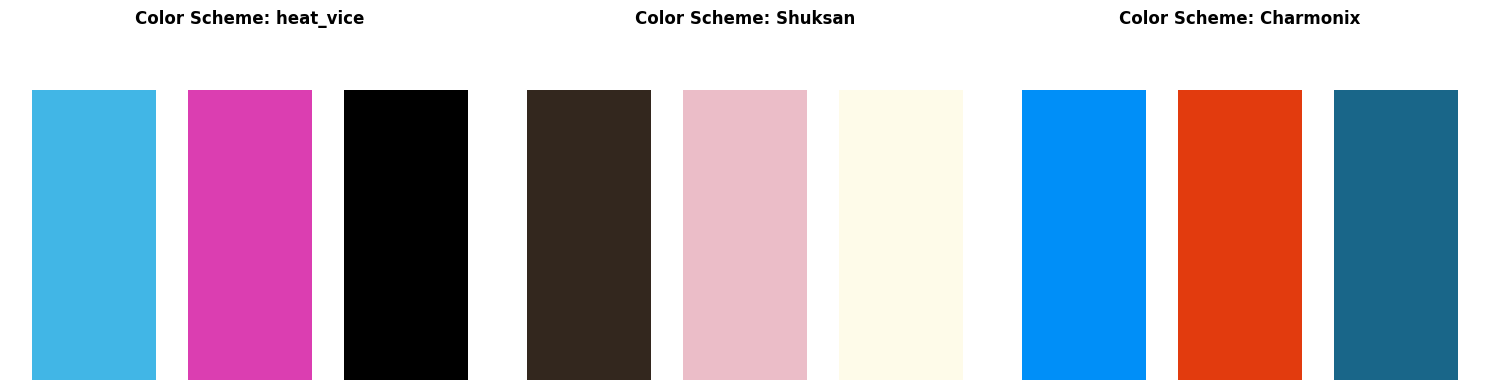

In [4]:
from pypalettes import load_cmap  # load more colormaps

# Demonstrate different color schemes
color_schemes = ["heat_vice", "Shuksan", "Charmonix"]  # pypalettes schemes

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, scheme in enumerate(color_schemes):
    # Set the color scheme
    set_cmap(scheme)

    # Create a simple visualization
    ax = axes[i]
    cmap = get_cmap()

    # Show colors
    n = 3
    colors = cmap(np.linspace(0, 1, n))
    bars = ax.bar(range(n), [1] * n, color=colors)
    ax.set_title(f"Color Scheme: {scheme}", fontweight="bold")
    ax.set_xticks(range(n))
    ax.set_ylim(0, 1.2)
    ax.set_axis_off()

plt.tight_layout()
plt.show()

In [5]:
# Set a nice color scheme for the rest of the tutorial
cmap = set_cmap("heat_vice")

🎨 Using AndyWarhol color scheme for the tutorial

:::{tip}

You can use any colormap supported by Matplotlib or `pypalettes`.
:::


## 📐 The Simplex Plot: Geometric Archetypal Visualization

The **simplex plot** is the crown jewel of archetypal analysis visualization. It represents each data point's archetypal composition in a geometric space where:

### 🔍 Understanding Simplex Geometry
- **Corners (vertices)** = Pure archetypes (100% one type, 0% others)
- **Edges** = Two-way mixtures between adjacent archetypes
- **Interior** = Multi-way mixtures of all archetypes
- **Distance from corner** = Dissimilarity from that pure archetypal form

### Key Benefits:
- **Intuitive interpretation**: Immediately see pure vs. mixed examples
- **Pattern recognition**: Spot clusters, gradients, and outliers
- **Archetypal purity**: Identify the most "pure" examples of each type

Let's start with a basic simplex plot and gradually add customizations:

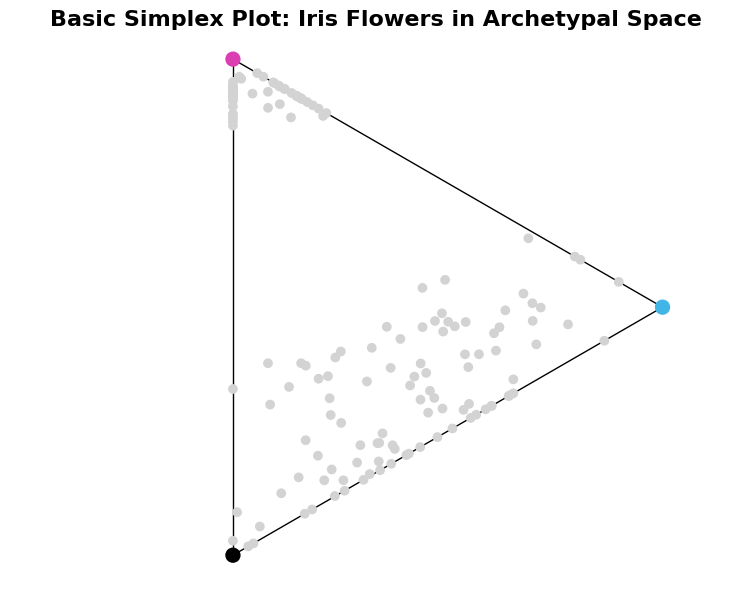

In [6]:
# Create a basic simplex plot
fig, ax = plt.subplots(figsize=(8, 6))

# Basic simplex plot
simplex(
    coefficients,  # Our similarity degrees (alpha coefficients)
    vertices_params={"cmap": cmap},
    ax=ax,
)

ax.set_title("Basic Simplex Plot: Iris Flowers in Archetypal Space", fontsize=16, fontweight="bold")

plt.tight_layout()
plt.show()

🎯 Quick interpretation:
   - Each gray dot represents one iris flower
   - Colored X markers show the three archetypes (corners)
   - Points near corners are 'pure' examples
   - Points in center are balanced mixtures

## 🛠️ Simplex Function: Complete Parameter Guide

The `simplex()` function offers extensive customization options. Let's explore each parameter group:

### Core Parameters
- **`points`**: The mixture coefficients matrix (n_samples × n_archetypes)
- **`ax`**: Matplotlib axes object (optional)

### Simplex Structure Controls
- **`show_axis`**: Whether to draw the simplex edges (default: True)
- **`axis_params`**: Styling for simplex edges (dict)
- **`origin`**: Center position of simplex (default: (0,0))

### Archetype Vertex Controls  
- **`show_vertices`**: Whether to show archetype markers (default: True)
- **`vertices_params`**: Styling for archetype markers (dict)

### Data Point Styling
- **`**params`**: All matplotlib scatter parameters (color, size, alpha, etc.)

Let's demonstrate these with progressively more sophisticated examples:

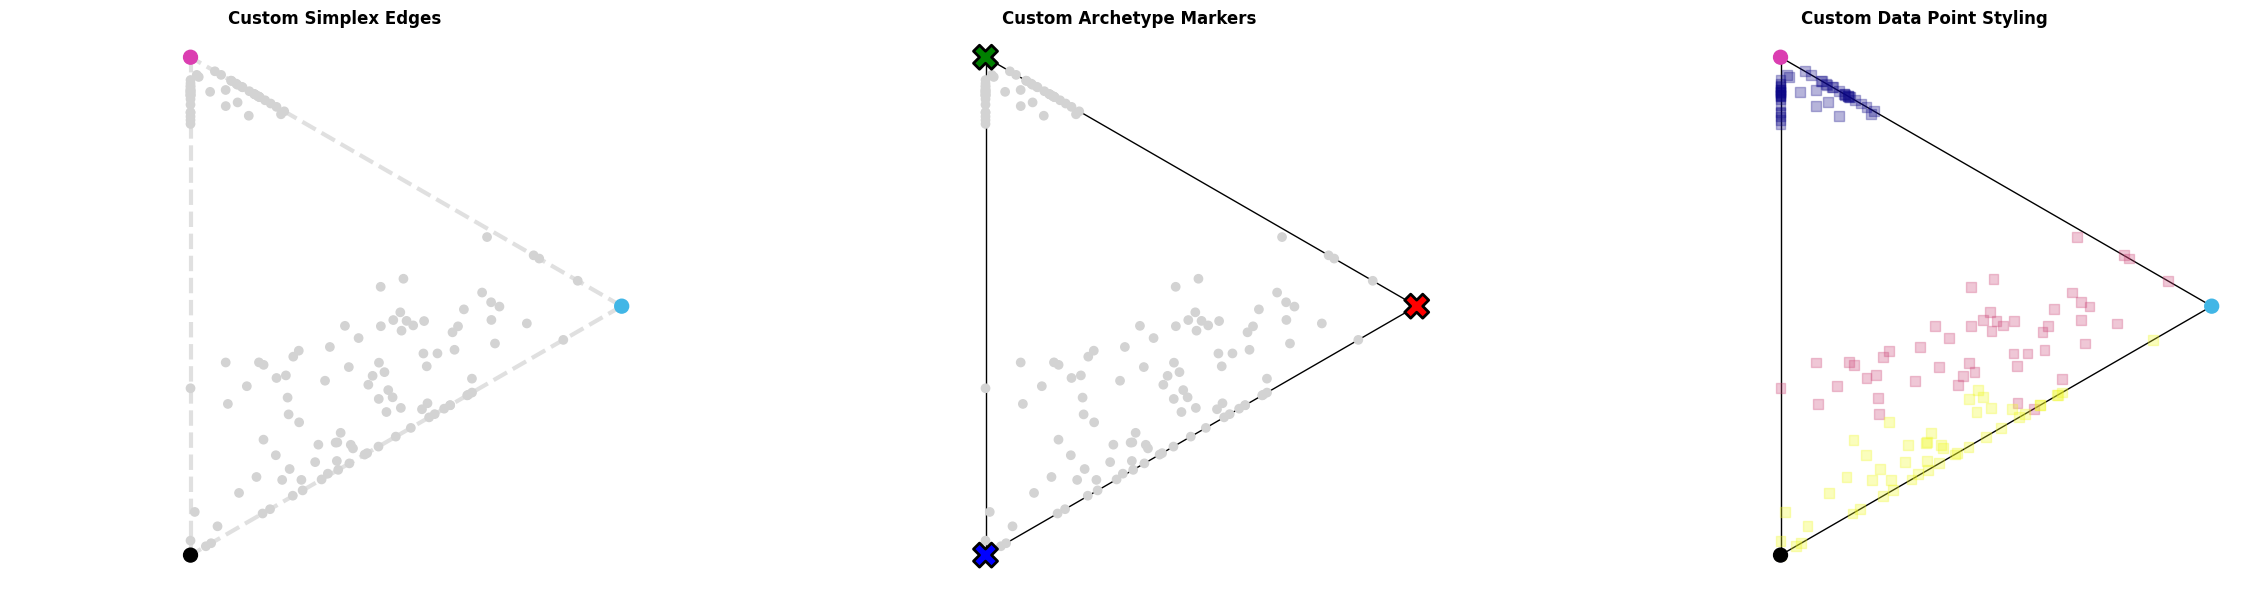

In [7]:
# Advanced simplex plot with extensive customization
fig, axes = plt.subplots(1, 3, figsize=(24, 6))
axes = axes.ravel()

# 1. Custom axis styling
simplex(
    coefficients,
    show_axis=True,
    axis_params={"color": "lightgrey", "linewidth": 3, "linestyle": "--", "alpha": 0.7},
    ax=axes[0],
)
axes[0].set_title("Custom Simplex Edges", fontweight="bold")

# 2. Custom vertex styling
simplex(
    coefficients,
    vertices_params={
        "c": ["red", "green", "blue"],
        "s": 300,
        "marker": "X",  # Square markers
        "edgecolor": "black",
        "linewidth": 2,
    },
    ax=axes[1],
)
axes[1].set_title("Custom Archetype Markers", fontweight="bold")

# 3. Custom data point styling
simplex(
    coefficients,
    # Color points by their true species
    c=iris.target,
    cmap="plasma",
    marker="s",
    s=50,
    alpha=0.3,
    ax=axes[2],
)
axes[2].set_title("Custom Data Point Styling", fontweight="bold")

plt.tight_layout()
plt.show()

🎨 Styling Options Demonstrated:
   1. Custom simplex edge appearance
   2. Different archetype marker styles
   3. Custom data point colors and shapes

### 📊 Advanced Simplex Analysis Techniques

Let's explore some advanced techniques for extracting insights from simplex plots:

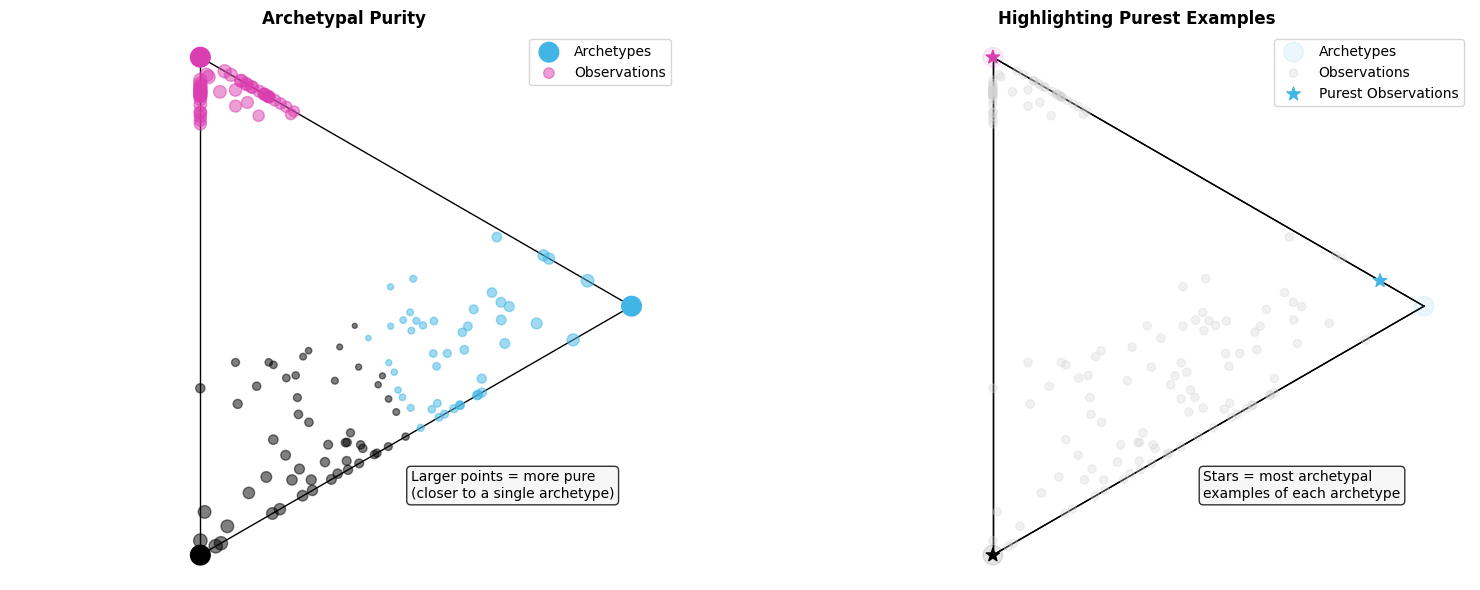

In [8]:
# Advanced analysis: Find and highlight archetypal extremes
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Calculate archetypal purity (how close to pure archetypes)
max_similarity = np.max(coefficients, axis=1)
dominant_archetype = np.argmax(coefficients, axis=1)

# Left plot: Size points by purity
simplex(
    coefficients,
    s=max_similarity**2 * 100,  # Size proportional to purity
    c=dominant_archetype,
    alpha=0.5,
    vertices_params={"s": 200},
    ax=axes[0],
)
axes[0].set_title("Archetypal Purity", fontweight="bold")
axes[0].legend(loc="upper right")

# Add explanatory text
textstr = "\n".join(
    [
        "Larger points = more pure\n(closer to a single archetype)",
    ]
)
props = dict(boxstyle="round", facecolor="whitesmoke", alpha=0.8)
axes[0].text(
    0.6, 0.2, textstr, transform=axes[0].transAxes, fontsize=10, verticalalignment="top", bbox=props
)


# Right plot: Identify most extreme examples
# Find most pure examples of each archetype
pure_examples = []
for i in range(3):
    # Find the most similar to archetype i
    most_similar_idx = np.argmax(coefficients[:, i])
    pure_examples.append(most_similar_idx)

# Regular simplex plot
simplex(coefficients, alpha=0.3, ax=axes[1], vertices_params={"s": 200, "alpha": 0.1})
simplex(
    coefficients[pure_examples],
    marker="*",
    s=100,
    c=[0, 1, 2],
    show_vertices=False,
    zorder=2,
    ax=axes[1],
    label="Purest Observations",
)

axes[1].set_title("Highlighting Purest Examples", fontweight="bold")
axes[1].legend(loc="upper right")

textstr = "\n".join(
    [
        "Stars = most archetypal\nexamples of each archetype",
    ]
)
props = dict(boxstyle="round", facecolor="whitesmoke", alpha=0.8)
axes[1].text(
    0.6, 0.2, textstr, transform=axes[1].transAxes, fontsize=10, verticalalignment="top", bbox=props
)

plt.tight_layout()
plt.show()

🔍 Purity Analysis:
- Average purity: 0.713
- Most pure overall: 1.000
- Least pure (most mixed): 0.360

⭐ Purest examples of each archetype:
- Archetype 1: Flower #60 (versicolor, purity: 0.898)
- Archetype 2: Flower #22 (setosa, purity: 1.000)
- Archetype 3: Flower #117 (virginica, purity: 1.000)

## 📊 Stacked Bar Charts: Composition Analysis

While simplex plots show geometric relationships, **stacked bar charts** excel at showing detailed compositional breakdowns. They're perfect for:

### Key Advantages:
- **Individual inspection**: Examine each data point's exact composition
- **Ranking by purity**: Easily identify most/least pure examples
- **Transition patterns**: See gradual changes between archetypal regions
- **Quantitative precision**: Read exact percentage contributions

### When to Use Stacked Bars vs Simplex:
- **Simplex**: Overall patterns, clustering, geometric intuition
- **Stacked bars**: Precise composition, individual analysis, ranking

Let's start with basic stacked bar visualizations:

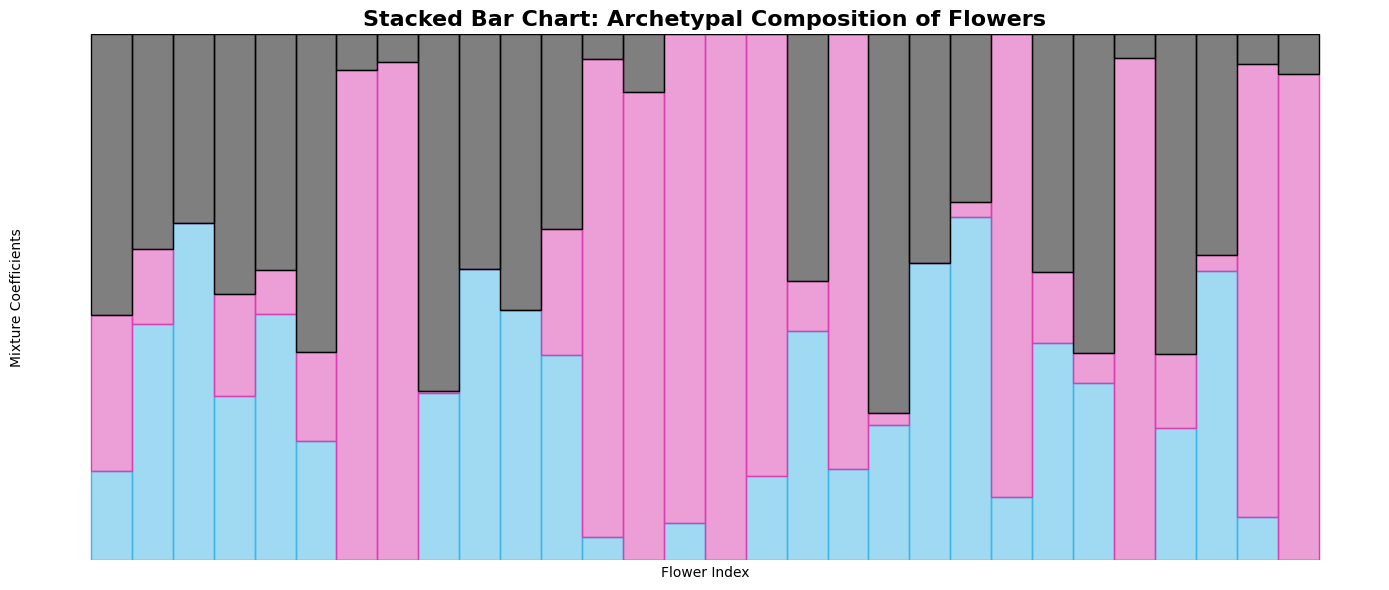

In [9]:
# Basic stacked bar chart
fig, ax = plt.subplots(figsize=(14, 6))

idx = np.random.choice(range(coefficients.shape[0]), size=30, replace=False)
# Show 30 random flowers for clarity
stacked_bar(coefficients[idx], cmap=cmap, ax=ax)

ax.set_title("Stacked Bar Chart: Archetypal Composition of Flowers", fontsize=16, fontweight="bold")
ax.set_xlabel("Flower Index")

plt.tight_layout()
plt.show()

📊 Reading the chart:
   - Each bar represents one flower
   - Bar height = 1.0 (all compositions sum to 100%)
   - Colors show archetypal contributions
   - Taller color segments = stronger resemblance to that archetype

## 🛠️ Stacked Bar Function: Parameter Reference

The `stacked_bar()` function provides several customization options:

### Core Parameters
- **`points`**: The mixture coefficients matrix (n_samples × n_archetypes)
- **`ax`**: Matplotlib axes object (optional)

### Styling Parameters
- **`color`**: Colors for each archetype (list or string)
- **`edgecolor`**: Edge colors for bars
- **`width`**: Bar width (default: 1)
- **`**params`**: Additional matplotlib bar parameters

Let's demonstrate these customization options:

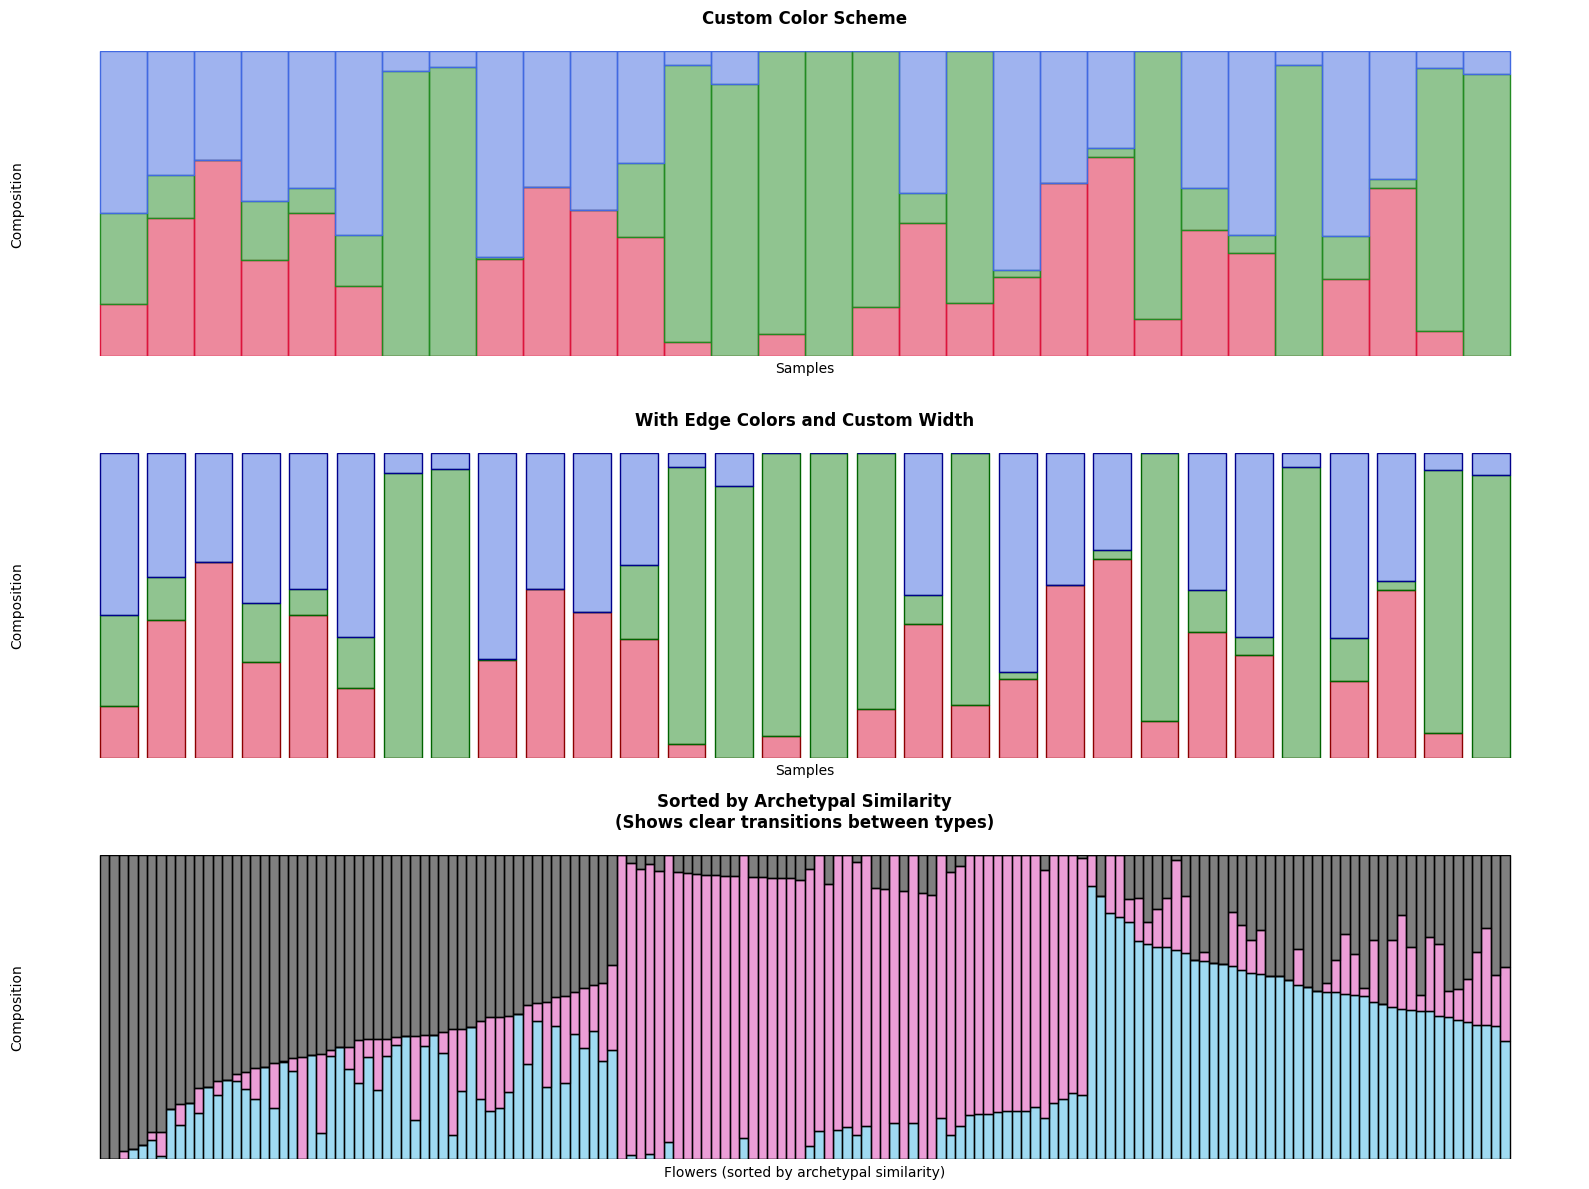

In [10]:
# Advanced stacked bar customizations
fig, axes = plt.subplots(3, 1, figsize=(16, 12))

# 1. Custom colors
stacked_bar(coefficients[idx], color=["crimson", "forestgreen", "royalblue"], ax=axes[0])
axes[0].set_title("Custom Color Scheme", fontweight="bold", pad=20)
axes[0].set_ylabel("Composition")

# 2. With custom edge colors for better separation
stacked_bar(
    coefficients[idx],
    color=["crimson", "forestgreen", "royalblue"],
    edgecolor=["darkred", "darkgreen", "darkblue"],
    width=0.8,  # Narrower bars
    ax=axes[1],
)
axes[1].set_title("With Edge Colors and Custom Width", fontweight="bold", pad=20)
axes[1].set_ylabel("Composition")

# 3. Using sorted data for better pattern recognition
sorted_coefficients, sort_info = sort_by_archetype_similarity(
    coefficients, [coefficients], archetypes
)

stacked_bar(sorted_coefficients, edgecolor="black", ax=axes[2])
axes[2].set_title(
    "Sorted by Archetypal Similarity\n(Shows clear transitions between types)",
    fontweight="bold",
    pad=20,
)
axes[2].set_ylabel("Composition")
axes[2].set_xlabel("Flowers (sorted by archetypal similarity)")

plt.tight_layout()
plt.show()

🎨 Customization benefits:
   1. Custom colors improve visual distinction
   2. Edge colors help separate contributions
   3. Sorting reveals archetypal progression patterns

### 📈 Advanced Stacked Bar Analysis

Let's explore some advanced techniques for extracting insights from stacked bar charts:

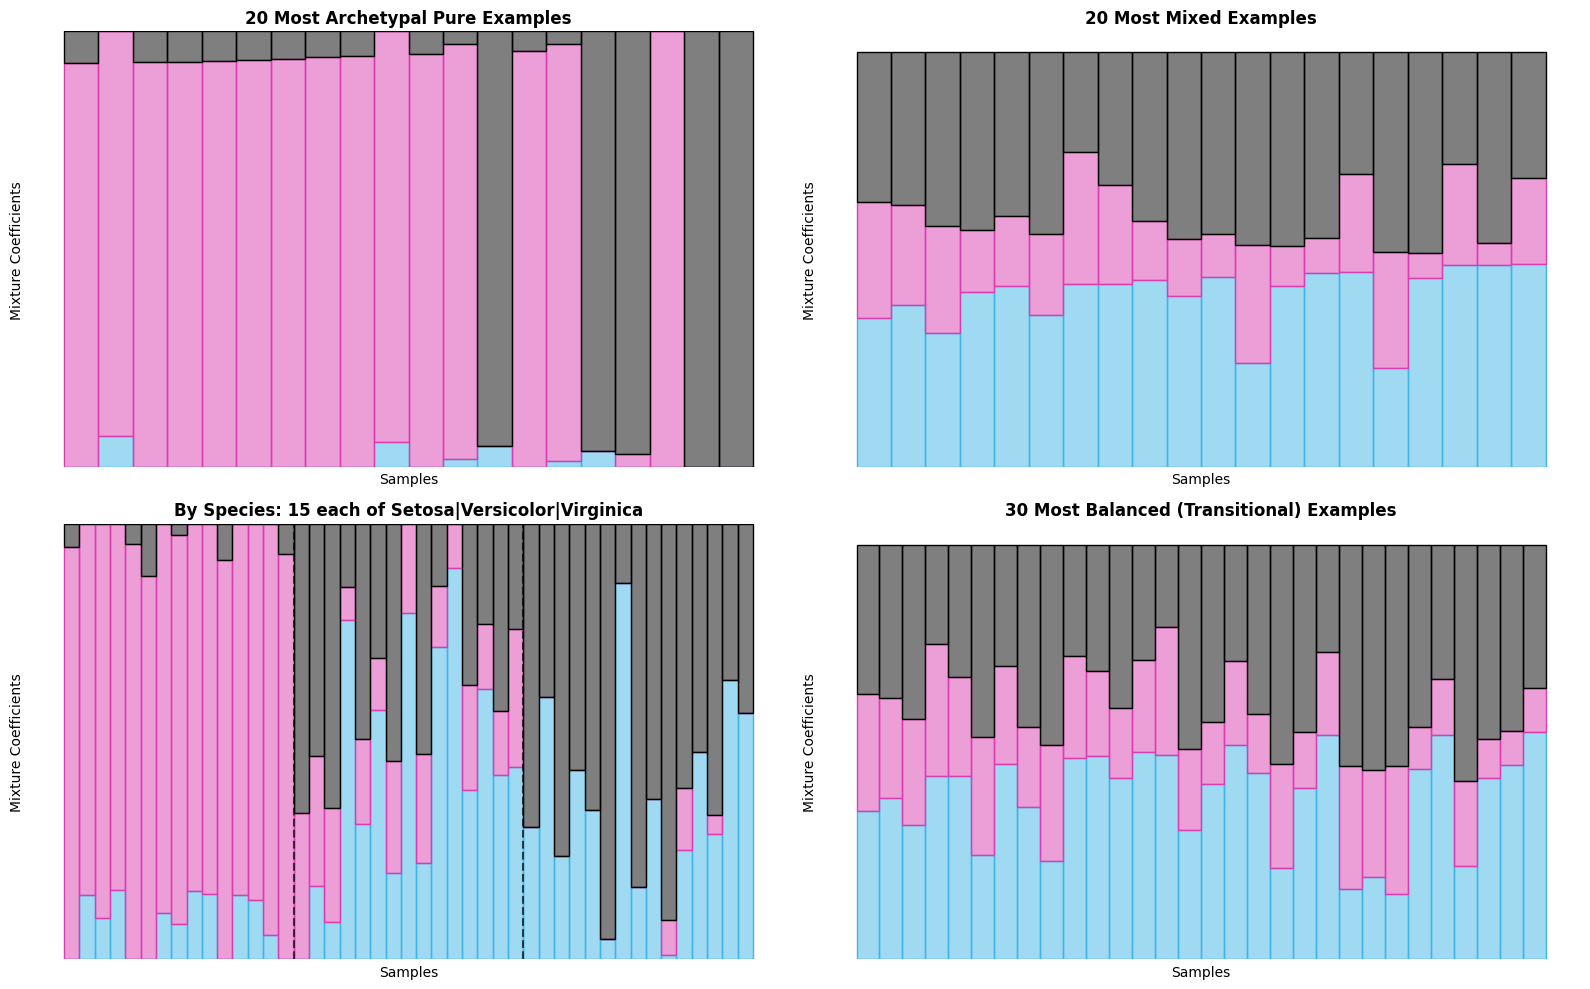

In [11]:
# Advanced analysis: Identify interesting patterns
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.ravel()

# 1. Most pure examples (high max similarity)
pure_indices = np.argsort(max_similarity)[-20:]  # 20 most pure
pure_coefficients = coefficients[pure_indices]
stacked_bar(pure_coefficients, ax=axes[0])
axes[0].set_title("20 Most Archetypal Pure Examples", fontweight="bold")

# 2. Most mixed examples (low max similarity)
mixed_indices = np.argsort(max_similarity)[:20]  # 20 most mixed
mixed_coefficients = coefficients[mixed_indices]
stacked_bar(mixed_coefficients, ax=axes[1])
axes[1].set_title("20 Most Mixed Examples", fontweight="bold")

# 3. Examples from each species
species_coefficients = []
for species_idx in range(3):
    species_mask = iris.target == species_idx
    species_data = coefficients[species_mask][:15]  # First 15 of each species
    species_coefficients.append(species_data)

combined_species = np.vstack(species_coefficients)
stacked_bar(combined_species, ax=axes[2])
axes[2].set_title("By Species: 15 each of Setosa|Versicolor|Virginica", fontweight="bold")

# Add vertical lines to separate species
axes[2].axvline(14.5, color="black", linestyle="--", alpha=0.7)
axes[2].axvline(29.5, color="black", linestyle="--", alpha=0.7)

# 4. Highlight transition examples (balanced mixtures)
# Find examples that are roughly balanced between archetypes
balance_score = np.std(coefficients, axis=1)  # Low std = more balanced
balanced_indices = np.argsort(balance_score)[:30]  # 30 most balanced
balanced_coefficients = coefficients[balanced_indices]
stacked_bar(balanced_coefficients, ax=axes[3])
axes[3].set_title("30 Most Balanced (Transitional) Examples", fontweight="bold")

plt.tight_layout()
plt.show()

🔍 Pattern Analysis:
- Pure examples: Clear dominance by single archetype
- Mixed examples: More balanced contributions
- Species patterns: Each species shows distinct archetypal signature
- Transitional examples: Represent 'hybrid' forms

## 🎯 Combined Analysis: Simplex + Stacked Bars

The real power comes from combining both visualization types! Let's create comprehensive analytical views that leverage the strengths of each approach:

### Best Practices for Combined Analysis:
1. **Use simplex for overview** → patterns, clusters, outliers
2. **Use stacked bars for details** → precise compositions, rankings
3. **Cross-reference findings** → validate patterns across both views
4. **Interactive exploration** → identify interesting points in simplex, examine in detail with stacked bars

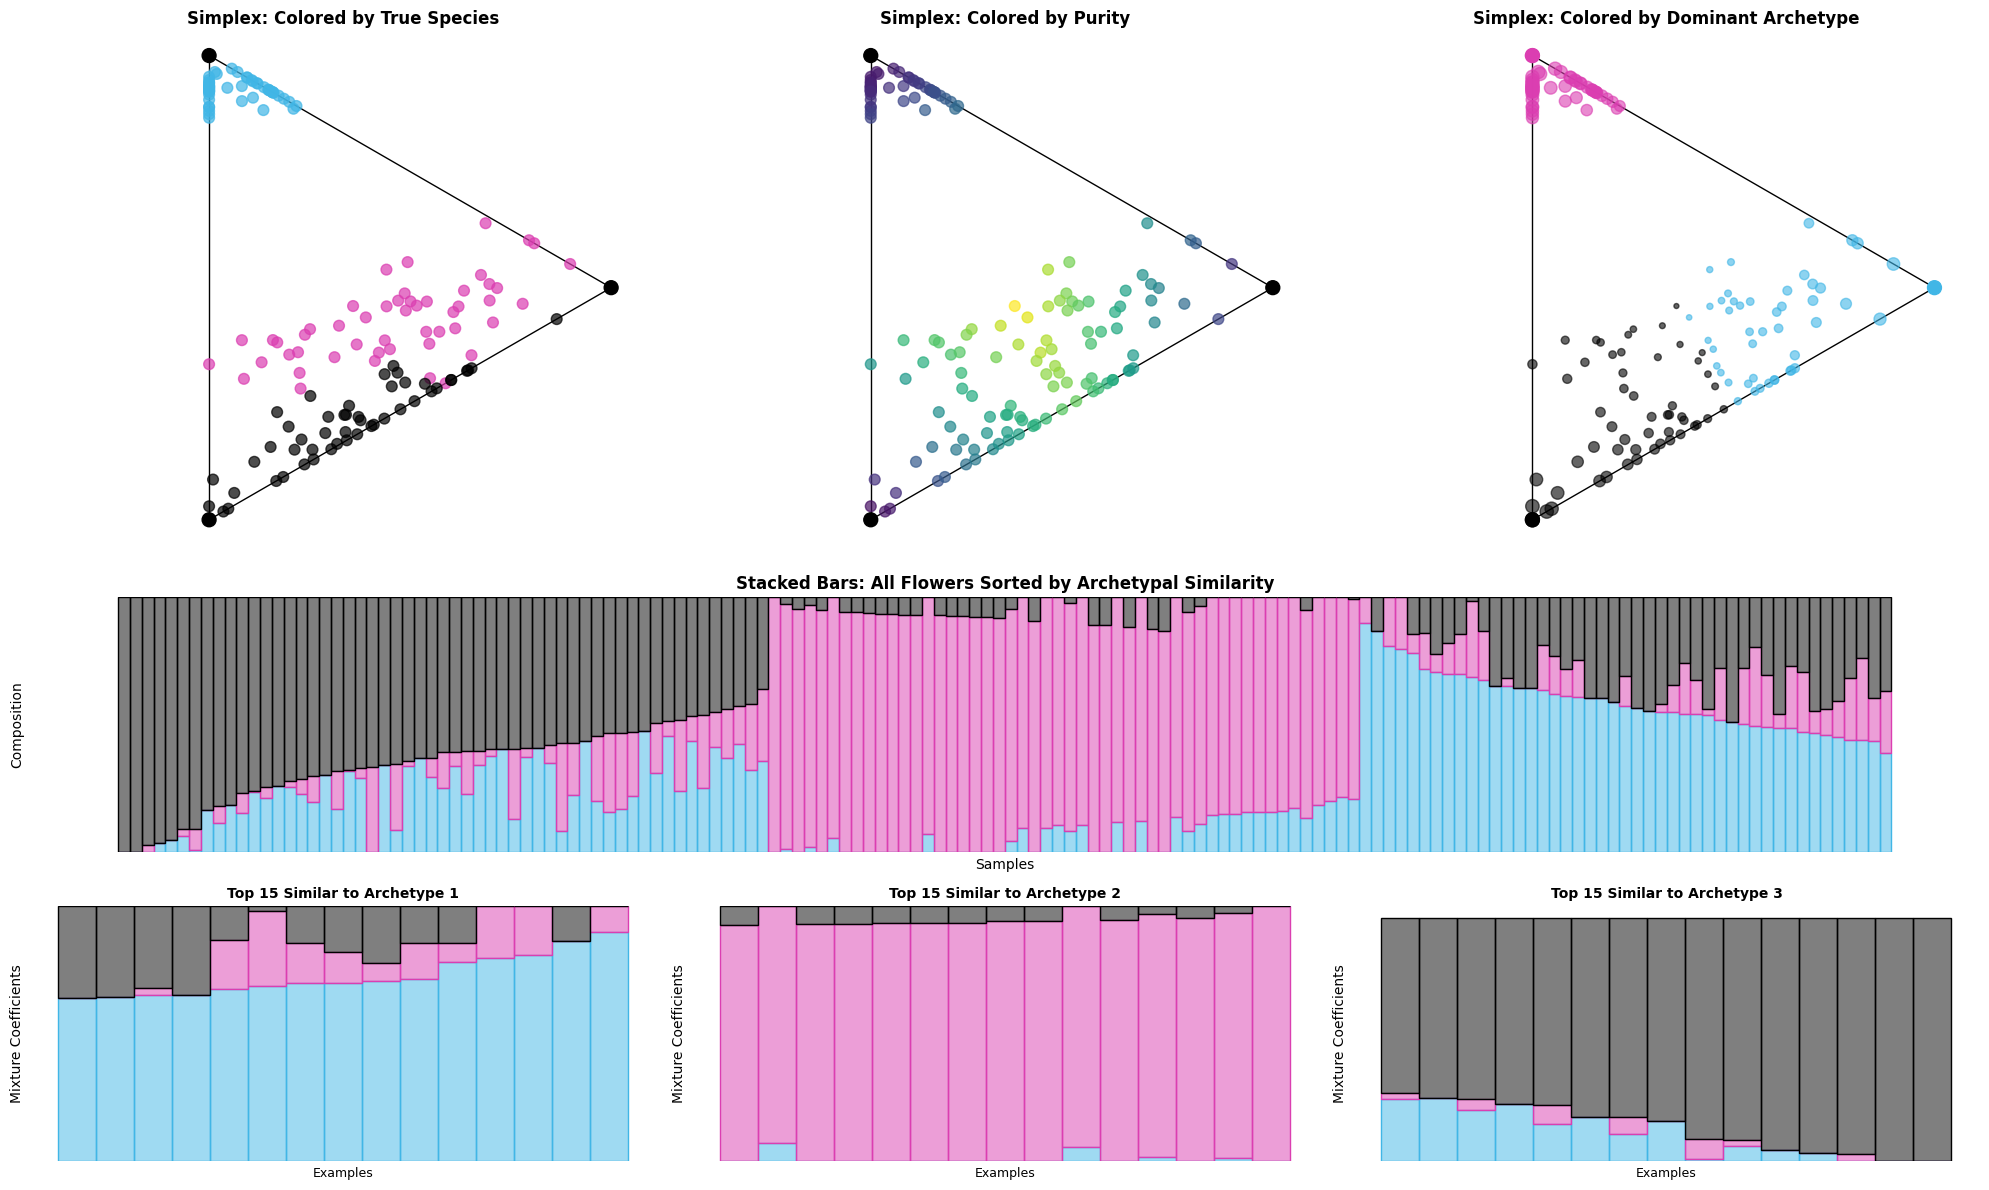

In [12]:
# Comprehensive combined analysis
fig = plt.figure(figsize=(20, 12))

# Create custom layout
gs = fig.add_gridspec(3, 3, height_ratios=[2, 1, 1], width_ratios=[1, 1, 1])

# Top row: Two simplex views
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])

# Simplex 1: Color by species (ground truth)
simplex(
    coefficients,
    c=iris.target,
    s=60,
    alpha=0.7,
    vertices_params={"c": "black"},
    ax=ax1,
)
ax1.set_title("Simplex: Colored by True Species", fontweight="bold")

# Simplex 2: Color by archetypal purity
simplex(
    coefficients,
    c=max_similarity,
    cmap="viridis_r",  # Sequential colormap for purity
    s=60,
    alpha=0.7,
    vertices_params={"c": "black"},
    ax=ax2,
)
ax2.set_title("Simplex: Colored by Purity", fontweight="bold")

# Simplex 3: Size by purity, color by dominant archetype
simplex(
    coefficients,
    c=[i for i in dominant_archetype],
    s=max_similarity**2 * 100,
    alpha=0.6,
    ax=ax3,
)
ax3.set_title("Simplex: Colored by Dominant Archetype", fontweight="bold")

# Middle row: Stacked bar - sorted by archetypal similarity
ax4 = fig.add_subplot(gs[1, :])
stacked_bar(sorted_coefficients, ax=ax4)
ax4.set_title("Stacked Bars: All Flowers Sorted by Archetypal Similarity", fontweight="bold")
ax4.set_ylabel("Composition")

# Bottom row: Focused stacked bars
ax5 = fig.add_subplot(gs[2, 0])
ax6 = fig.add_subplot(gs[2, 1])
ax7 = fig.add_subplot(gs[2, 2])

# Pure examples for each archetype
for arch_idx in range(3):
    # Find examples with high similarity to this archetype
    arch_similarity = coefficients[:, arch_idx]
    top_indices = np.argsort(arch_similarity)[-15:]  # Top 15
    arch_examples = coefficients[top_indices]

    ax = [ax5, ax6, ax7][arch_idx]
    stacked_bar(arch_examples, ax=ax)
    ax.set_title(f"Top 15 Similar to Archetype {arch_idx+1}", fontweight="bold", fontsize=10)
    ax.set_xlabel("Examples", fontsize=9)

plt.tight_layout()
plt.show()

   📐 Simplex plots reveal:
  - Overall archetypal structure and clustering patterns
  - Relationship between species and discovered archetypes
  - Distribution of purity across the dataset

📊 Stacked bar charts show:
  - Precise archetypal compositions for each flower
  - Clear transitions between archetypal regions
  - Most representative examples of each archetype

🔄 Combined insights:
  - Species correspond well to archetypal clusters
  - Some flowers are archetypal 'hybrids'
  - Clear archetypal hierarchy exists in the data

## 🎓 Key Takeaways

Congratulations! You've mastered the art of archetypal analysis visualization. Here's what you've learned:

### 🔑 Core Visualization Concepts
1. **Simplex plots**: Geometric representation revealing archetypal relationships
2. **Stacked bar charts**: Precise compositional analysis and ranking
3. **Combined analysis**: Leveraging strengths of multiple visualization types
4. **Progressive disclosure**: Building complexity gradually for better understanding

### 🛠️ Technical Skills Acquired
- **Function mastery**: Complete control over `simplex()` and `stacked_bar()` parameters
- **Color management**: Professional color schemes using `set_cmap()` and `pypalettes`
- **Advanced styling**: Custom markers, colors, sizes, and annotations
- **Data sorting**: Using `sort_by_archetype_similarity()` for better patterns

### 📊 Analytical Techniques
- **Purity analysis**: Identifying most/least archetypal examples
- **Pattern recognition**: Spotting clusters, transitions, and outliers
- **Cross-validation**: Using ground truth labels to validate discoveries
- **Interactive exploration**: Moving between overview and detail views

### 🎯 When to Use Each Visualization

| Visualization | Best For | Key Strengths |
|---------------|----------|---------------|
| **Simplex Plot** | • Overall patterns<br>• Geometric intuition<br>• Cluster identification | • Natural archetypal space<br>• Easy pure/mixed distinction<br>• Handles any number of archetypes |
| **Stacked Bar** | • Precise compositions<br>• Individual analysis<br>• Ranking by purity | • Quantitative precision<br>• Easy comparison<br>• Clear transitions |

### 🚀 Next Steps

Ready to apply these techniques to your own data? Here are your next adventures:

#### 📚 Advanced Techniques
- **Interactive visualizations**: Add `plotly` for web-based exploration
- **Animation**: Show archetypal evolution over time or iterations
- **Custom layouts**: Design domain-specific visualization dashboards

#### 🎨 Visualization Extensions
- **Network plots**: Show relationships between archetypal regions
- **Heatmaps**: Display archetypal similarity matrices
- **Time series**: Track archetypal evolution over time
- **Geographic plots**: Map archetypal patterns to geographic regions

**Happy visualizing!** 🎉

*Remember: Great visualizations don't just show data – they reveal insights that guide better decisions.*